In [89]:
import pandas as pd
import seaborn as sns
import ast

In [90]:
job_posting = pd.read_csv('freelancer_job_postings.csv')

In [91]:
job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   projectId              9193 non-null   int64  
 1   job_title              9193 non-null   object 
 2   job_description        9193 non-null   object 
 3   tags                   9193 non-null   object 
 4   client_state           8828 non-null   object 
 5   client_country         9192 non-null   object 
 6   client_average_rating  9193 non-null   float64
 7   client_review_count    9193 non-null   int64  
 8   min_price              9193 non-null   float64
 9   max_price              9193 non-null   float64
 10  avg_price              9193 non-null   float64
 11  currency               9193 non-null   object 
 12  rate_type              9193 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 933.8+ KB


In [92]:
# I drop client state column since i not consider it as important info
job_posting.drop(columns=['client_state'], inplace=True)

In [93]:
# client country have 1 row that blank so I fill it with N/A
job_posting['client_country'].fillna('N/A', inplace=True)

In [94]:
#Then check again, no blank in value
job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   projectId              9193 non-null   int64  
 1   job_title              9193 non-null   object 
 2   job_description        9193 non-null   object 
 3   tags                   9193 non-null   object 
 4   client_country         9193 non-null   object 
 5   client_average_rating  9193 non-null   float64
 6   client_review_count    9193 non-null   int64  
 7   min_price              9193 non-null   float64
 8   max_price              9193 non-null   float64
 9   avg_price              9193 non-null   float64
 10  currency               9193 non-null   object 
 11  rate_type              9193 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 862.0+ KB


In [95]:
#check number of post in each job title
job_posting['job_title'].value_counts().head(20)

#Then we see the same job title but use different case letter
# we have to update these column name to be consistency

Data Analysis            47
Data analysis            32
data analysis            28
Data entry               27
Data analysis            25
Data entry               21
data entry               15
Data Entry               14
Data Analyst             11
data analyst             10
Data Analytics            8
data analytics            7
Excel data analysis       7
I need a statistician     7
Data entry and excel      7
Statistics                7
Data analysis  -- 2       6
Data Analysis             6
Statistical analysis      6
Python project            6
Name: job_title, dtype: int64

In [96]:
job_posting['job_title'] = job_posting['job_title'].str.title()
job_posting['job_title'] = job_posting['job_title'].str.strip()

In [97]:
job_posting['job_title'].value_counts().head(20)

Data Analysis            149
Data Entry                89
Data Analyst              32
Data Analytics            27
Excel Data Analysis       23
Statistical Analysis      21
Python Project            17
Excel Expert              15
Data Science              13
Spss Analysis             12
I Need A Statistician     12
Data Analysis -- 2        12
Data Analysis Project     11
Data Scientist            11
Statistics                11
Data Entry -- 2           10
Excel Sheet               10
Data Entry And Excel       9
Data Analysis  -- 2        9
Sentiment Analysis         9
Name: job_title, dtype: int64

In [98]:
# We have to update currency to be in the same currency for further comparison
job_posting['currency'].unique()

array(['EUR', 'INR', 'USD', 'SGD', 'GBP', 'AUD', 'HKD', 'CAD', 'NZD'],
      dtype=object)

In [99]:
# I use conversion rate on 8 Jan, 2024 from "https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=THB"
conversion_rate = {'EUR': 1.094, 'INR': 0.012, 'USD': 1, 'SGD': 0.752,
                    'GBP': 1.272, 'AUD': 0.671, 'HKD': 0.128, 'CAD': 0.748,
                    'NZD': 0.624}

In [100]:
# Applying currency conversion

# min_price:
job_posting['min_price(USD)'] = job_posting.apply(lambda x: x['min_price'] * conversion_rate[x['currency']],axis=1)
# max_price:
job_posting['max_price(USD)'] = job_posting.apply(lambda x: x['max_price'] * conversion_rate[x['currency']],axis=1)
# avg_price:
job_posting['avg_price(USD)'] = job_posting.apply(lambda x: x['avg_price'] * conversion_rate[x['currency']],axis=1)

In [101]:
job_posting.head(5)

,projectId,job_title,job_description,tags,client_country,client_average_rating,client_review_count,min_price,max_price,avg_price,currency,rate_type,min_price(USD),max_price(USD),avg_price(USD)
0,37426471,Development And Implementation Of A Federated ...,please bid only if you are ready to do the wor...,"['algorithm', 'java', 'python', 'machine learn...",Germany,5.0,17,8.0,30.0,19.0,EUR,fixed,8.752,32.82,20.786
1,37421546,Data Entry -- 2,Project Title: Data Entry - Data Analysis in E...,"['excel', 'statistical analysis', 'statistics'...",India,0.0,0,750.0,1250.0,1000.0,INR,hourly,9.000,15.00,12.000
2,37400492,Data Scrap,I am looking for a freelancer who can help me ...,"['web scraping', 'data mining', 'data entry', ...",France,5.0,1,30.0,250.0,140.0,EUR,fixed,32.820,273.50,153.160
3,37404568,Big Data Project,Store Sales Data Analysis: A Data Engineering ...,"['big data sales', 'data science', 'data minin...",India,5.0,2,5000.0,5500.0,5250.0,INR,fixed,60.000,66.00,63.000
4,37397423,Virtual Assistant / Research Assistant,Job Description: I am seeking a Virtual Assist...,"['data entry', 'virtual assistant', 'web searc...",United States,0.0,0,5.0,15.0,10.0,USD,hourly,5.000,15.00,10.000


In [102]:
# now we can drop column min_price, max_price, avg_price, and currency
job_posting.drop(columns=['min_price', 'max_price', 'avg_price', 'currency'], inplace=True)

In [103]:
# Now we focus on Tags column which tell skill requirement in each job
# Tags column are in a list form, but considered as string column by Pandas
# We have to convert it to a List type

job_posting['tags'] = job_posting['tags'].apply(ast.literal_eval)

In [106]:
# From this we know that most of job post have require 1-5 skills so let focus on this
job_posting['tags'].apply(len).value_counts()

5     6144
4     1252
3      872
2      682
1      114
6       33
7       25
8       16
9        8
13       7
11       7
10       6
12       5
14       4
15       4
19       3
21       3
27       2
17       2
25       1
16       1
22       1
46       1
Name: tags, dtype: int64

In [107]:
jobpost_filtered = job_posting[job_posting['tags'].apply(len) <= 5]
jobpost_filtered = jobpost_filtered.reset_index(drop=True)

In [108]:
# Seperate each tags into each column
# Column names for the tags (five):
column_names = [f'tag_{i+1}' for i in range(5)]

tags_list = jobpost_filtered['tags'].to_list()

tags_df = pd.DataFrame(tags_list, columns=column_names)
tags_df.tail()

,tag_1,tag_2,tag_3,tag_4,tag_5
9059,statistics,statistical analysis,r programming language,mathematics,None
9060,python,deep learning,computer vision,image processing,machine learning (ml)
9061,data processing,None,None,None,None
9062,data analysis,machine learning (ml),python,None,None
9063,google cloud platform,data warehousing,etl,python,pyspark


In [109]:
# change 'Non" cell to Blank Cell
tags_df = tags_df.applymap(lambda x: "" if x is None else x)

In [112]:
# Combined tag table with job post table
jobpost_combined = pd.concat([job_posting, tags_df], axis=1, join='inner')
jobpost_combined.tail()

,projectId,job_title,job_description,tags,client_country,client_average_rating,client_review_count,rate_type,min_price(USD),max_price(USD),avg_price(USD),tag_1,tag_2,tag_3,tag_4,tag_5
9059,32044114,Marketing Research And Data Analysis Report St...,"this is a group work, my part is below, Retent...","[data analytics, market research, marketing st...",Hong Kong,5.0,3,fixed,10.00,30.00,20.00,statistics,statistical analysis,r programming language,mathematics,
9060,32046560,Market Basket Analysis With R,Need a data analysis project made on R or Pyth...,"[machine learning (ml), r programming language...",India,0.0,0,fixed,18.00,150.00,84.00,python,deep learning,computer vision,image processing,machine learning (ml)
9061,32048108,Data Entry / Analysis,We urgently require an excel/finane/data entry...,"[excel, data entry, data processing, data mini...",United States,5.0,13,hourly,8.00,15.00,11.50,data processing,,,,
9062,32049208,Update A Addin To Work On Excel 365,Hi I have an addin I purchased many years ago ...,"[excel, visual basic, visual basic for apps, d...",Australia,5.0,1,fixed,20.13,167.75,93.94,data analysis,machine learning (ml),python,,
9063,32051908,In Depth Excel Report Analysis,Raw data (Recruitment Status Report) that I wa...,"[excel, data processing, data entry, business ...",Saudi Arabia,5.0,3,fixed,10.00,30.00,20.00,google cloud platform,data warehousing,etl,python,pyspark


In [115]:
# combined five tags column into one to see most require skill
all_tags = pd.concat([tags_df['tag_1'], tags_df['tag_2'], tags_df['tag_3'], tags_df['tag_4'], tags_df['tag_5']]).reset_index(drop=True)
all_tags.value_counts().head(30)

                          5498
excel                     3125
python                    3076
statistics                2352
data processing           2342
statistical analysis      2181
data entry                1414
data mining               1250
machine learning (ml)     1226
r programming language    1204
software architecture     1071
spss statistics           1048
data analysis              789
php                        759
mysql                      683
web scraping               531
data analytics             520
data science               515
business analysis          501
visual basic               496
sql                        480
mathematics                429
java                       364
research                   363
javascript                 362
finance                    347
research writing           318
accounting                 315
algorithm                  308
web search                 290
dtype: int64

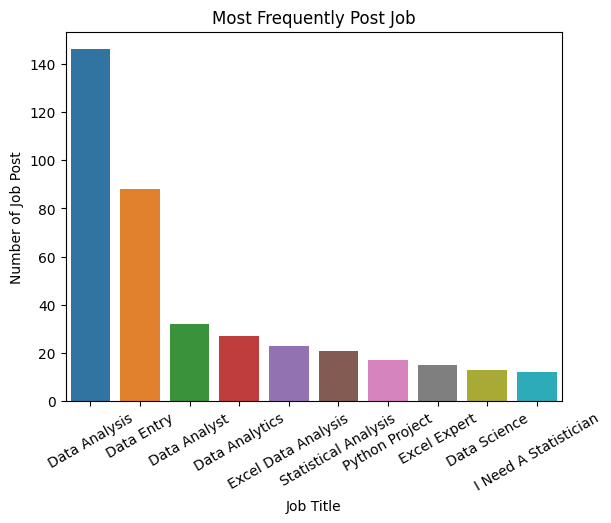

In [116]:
# Plot 10 most frequently post job
jobpost_top_10 = jobpost_combined['job_title'].value_counts()[0:10]
sns.barplot(x=jobpost_top_10.index, y=jobpost_top_10.values)
plt.title("Most Frequently Post Job")
plt.xlabel("Job Title")
plt.ylabel("Number of Job Post")
plt.xticks(rotation=30)
plt.show()

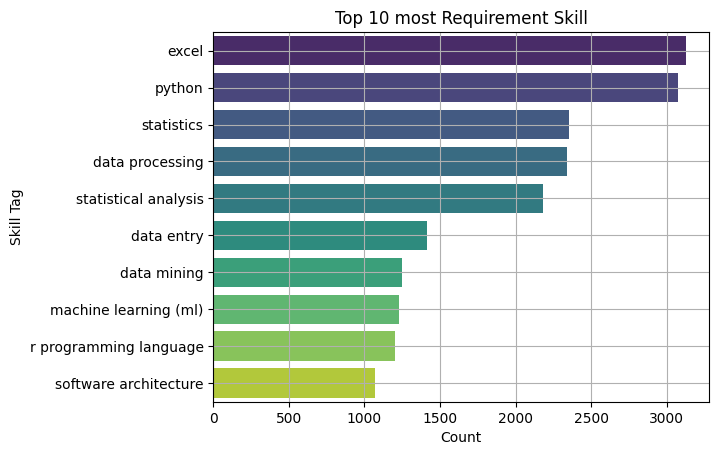

In [117]:
# Plot Top 10 most requirement skill
tag_counts = all_tags[all_tags != ""].value_counts()
sns.barplot(x=tag_counts.head(10), y=tag_counts.head(10).index, palette='viridis')
plt.title('Top 10 most Requirement Skill')
plt.xlabel('Count')
plt.ylabel('Skill Tag')
plt.grid(True)
plt.show()